In [1]:
import pandas as pd
import numpy as np
import json
import re
from llms import gemini
from llms import chatGPT
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D  # for 3D plotting
import plotly.express as px
from sklearn.manifold import TSNE
from reportlab.pdfgen import canvas
from reportlab.lib.pagesizes import letter
from reportlab.lib.utils import ImageReader
import plotly.io as pio


x_chat = chatGPT()
x_gemini = gemini()

In [16]:
df = pd.read_csv("../output/df_tsne.csv") #pd.read_csv("../output/bls_df.csv",index_col=0)

df.example_task_embedding = df.example_task_embedding.apply(lambda x: [float(y) for y in x.strip("[]").split(", ")])
df.onet_task_embedding = df.onet_task_embedding.apply(lambda x: [float(y) for y in x.strip("[]").split(", ")])
df.onet_title_embedding = df.onet_title_embedding.apply(lambda x: [float(y) for y in x.strip("[]").split(", ")])

In [42]:
# activities_df = pd.read_csv("../input/onet/embeddings/activity_embeddings.csv")
# activities_df.embedding = activities_df.embedding.apply(lambda x: [float(y) for y in x.strip("[]").split(", ")])
# activity_embeddings = np.vstack(activities_df.embedding)
# task_embeddings = np.vstack(df.example_task_embedding)
# cosine_sim = cosine_similarity(task_embeddings, activity_embeddings, 'cosine')
# activities = list(activities_df.activity)
# df[activities] = cosine_sim
# skill_activity = pd.read_csv("../input/onet/Skills to Work Activities.csv")[["Work Activities Element Name","Skills Element Name"]]
# skill_activity.columns = ["activity","skill"]
# for group in skill_activity.groupby("skill"):
#     skill = group[0]
#     activities = group[1]["activity"].values
#     df[skill+"_task"] = df[activities].sum(axis=1)/len(activities)
# skills = list(skill_activity.skill.unique()+"_task")

In [19]:
# embeddings = np.vstack(df['example_task_embedding'].values)
# tsne = TSNE(n_components=3, perplexity=100, n_iter=1000)
# tsne_results = tsne.fit_transform(embeddings)
# df[["example_task_embedding_tsne1","example_task_embedding_tsne2"]] = tsne_results[:, [0,1]]


embeddings = np.vstack(df['onet_task_embedding'].values)
tsne = TSNE(n_components=3, perplexity=100, n_iter=1000)
tsne_results = tsne.fit_transform(embeddings)
df[["onet_task_embedding_tsne1","onet_task_embedding_tsne2"]] = tsne_results[:, [0,1]]

embeddings = np.vstack(df['onet_title_embedding'].values)
tsne = TSNE(n_components=3, perplexity=100, n_iter=1000)
tsne_results = tsne.fit_transform(embeddings)
df[["onet_title_embedding_tsne1","onet_title_embedding_tsne2"]] = tsne_results[:, [0,1]]



df.to_csv("../output/df_tsne.csv")

In [188]:
# occ_groups = list(df.groupby("Major Group Name")["organization_name"].count().sort_values(ascending=False).index)

# for value in activities:
#     for occ_group in occ_groups[:4]:
#         graph_df = df[df["Major Group Name"] == occ_group]
#         graph_df.head()
#         # Plot using Plotly with clusters
#         fig = px.scatter(graph_df, x='onet_task_embedding_tsne1', y='onet_task_embedding_tsne2',
#                          color=value,
#                          color_continuous_scale=px.colors.diverging.Tealrose,
#                          hover_data=['onet_task'],
#                          range_color=[0, .3],
#                          labels={value: 'Value'})
#         fig.update_traces(marker_size=10)                  
        
#         fig.update_layout(
#             title=f"{occ_group} {value}", 
#             hovermode='closest',
#             width=1000,  # Set the width of the figure
#             height=600  # Set the height of the figure
#         )
#         fig.show()

In [183]:
dwa = pd.read_csv("../input/onet/Tasks to DWAs.csv")
dwa = dwa[["DWA Title","DWA ID","Task"]]


In [36]:
dwa_ref = pd.read_csv("../input/onet/DWA Reference.csv")[["Element Name","DWA ID"]]
dwa_ref = dwa_ref.rename({"Element Name":"activity"},axis=1)
tf = tf.merge(dwa_ref, on="DWA ID",how="left")

In [143]:
df = df.merge(dwa, on="Task",how="left")


In [194]:
tf = tf.merge(dwa_ref, on="DWA ID",how="left")

In [200]:
tf[tf["DWA Title"].isnull()]

organization name  number  \
15           LlamaIndex       1   
16              Norm AI       1   
20           Sixfold AI       1   
34        Guardrails AI       1   
35        Guardrails AI       1   
...                 ...     ...   
14043         DecoverAI       1   
14048       RENTERS.COM       1   
14057         THREEO AI       1   
14060         THREEO AI       1   
14063           Cpen AI       1   

                                                 Example  \
15     A data analyst uses LlamaIndex to build a know...   
16     A legal professional uses Norm AI to automate ...   
20     An insurance underwriter utilizes Sixfold AI t...   
34     A software developer uses Guardrails AI to aut...   
35     A software developer uses Guardrails AI to aut...   
...                                                  ...   
14043  A paralegal uses DecoverAI to automatically ex...   
14048  A landlord uses the platform to automatically ...   
14057  A manufacturing supervisor uses THREEO AI to p...   
14060  A manufacturing supervisor uses THREEO AI to p...   
14063  A user subscribes to Cpen AI's newsletter, whi...   

                                  example_task_embedding founded date  \
15     [-0.03467566892504692, -0.020547065883874893, ...   2023-01-01   
16     [-0.024047836661338806, -0.024579279124736786,...   2023-01-01   
20     [-0.020719492807984352, -0.009365797974169254,...   2023-01-01   
34     [-0.019347339868545532, 0.030410747975111008, ...   2023-01-01   
35     [-0.019347339868545532, 0.030410747975111008, ...   2023-01-01   
...                                                  ...          ...   
14043  [-0.017564138397574425, -0.033558715134859085,...   2024-04-04   
14048  [0.01917881891131401, -0.038043659180402756, -...   2024-04-12   
14057  [-0.022638604044914246, -0.005515134893357754,...   2024-04-19   
14060  [-0.022638604044914246, -0.005515134893357754,...   2024-04-19   
14063  [-0.00562838651239872, -0.0370476096868515, -0...   2024-04-22   

                  website                                    description_all  \
15     www.llamaindex.ai/  LlamaIndex is a simple, flexible data framewor...   
16           www.norm.ai/  Norm AI provides an AI-powered regulatory comp...   
20         www.sixfold.ai  Sixfold AI is an insurtech startup that levera...   
34       guardrailsai.com  Guardrails AI empowers humanity to harness the...   
35       guardrailsai.com  Guardrails AI empowers humanity to harness the...   
...                   ...                                                ...   
14043      www.decover.ai  Next generation research and eDiscovery platfo...   
14048     www.renters.com  Prioritizing the human experience for housing ...   
14057          threeo.ai/  Enterprise AI THREEO AI provides over 20 turnk...   
14060          threeo.ai/  Enterprise AI THREEO AI provides over 20 turnk...   
14063            cpen.ai/  Artificial Intelligence News, Trending AI Tool...   

                                       industries_parsed  \
15                                          ['Software']   
16     ['Compliance', 'Information Technology', 'Lega...   
20     ['Generative AI', 'InsurTech', 'Productivity T...   
34                                                    []   
35                                                    []   
...                                                  ...   
14043  ['Information Technology', 'Legal Tech', 'Soft...   
14048                       ['Insurance', 'Real Estate']   
14057                         ['Information Technology']   
14060                         ['Information Technology']   
14063                                  ['Generative AI']   

                                   generated_description  \
15     LlamaIndex is an open-source framework that al...   
16     Norm AI is a platform that leverages AI to aut...   
20     Sixfold AI is an insurtech company using gener...   
34     Guardrails AI develops tools that help users c...   
35   

In [38]:
element_counts = tf["activity"].value_counts()
colors = px.colors.qualitative.Plotly
color_map = {element: colors[i % len(colors)] for i, element in enumerate(element_counts.index)}
df['Color'] = tf['activity'].map(color_map)

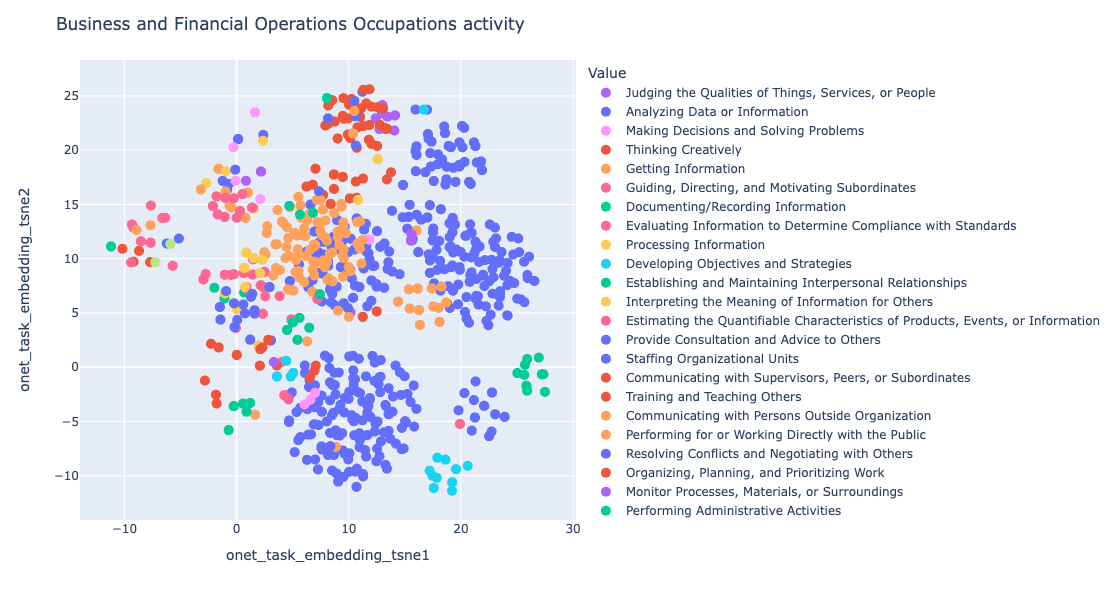

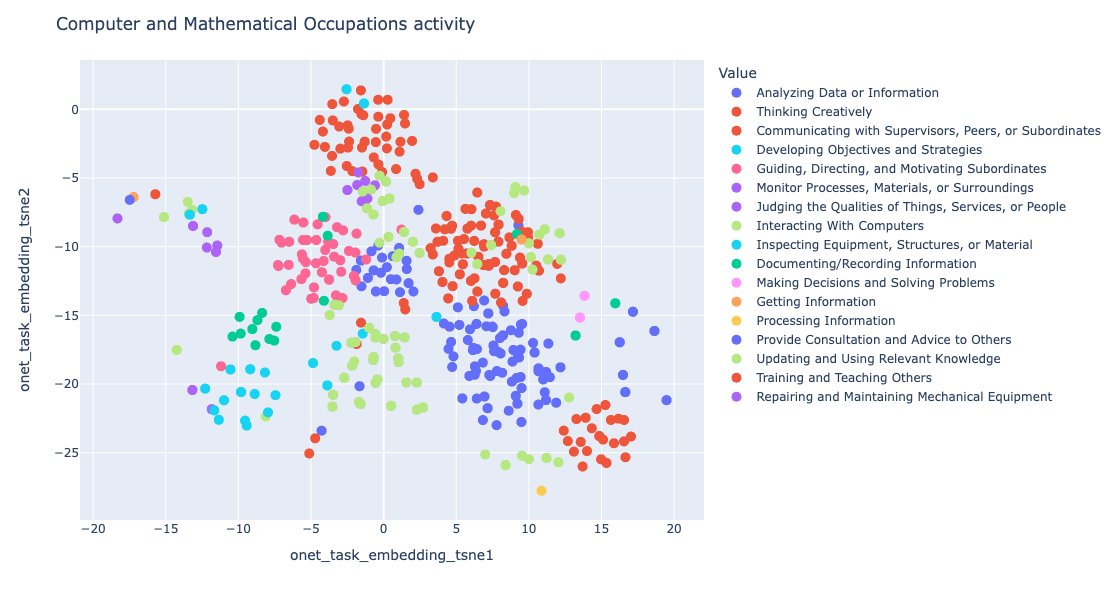

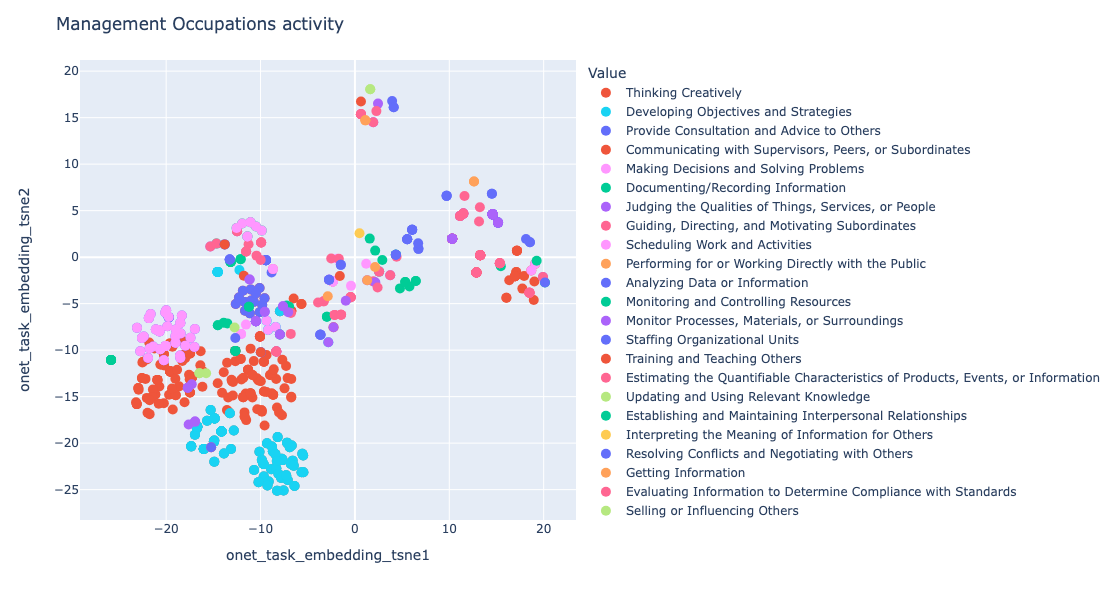

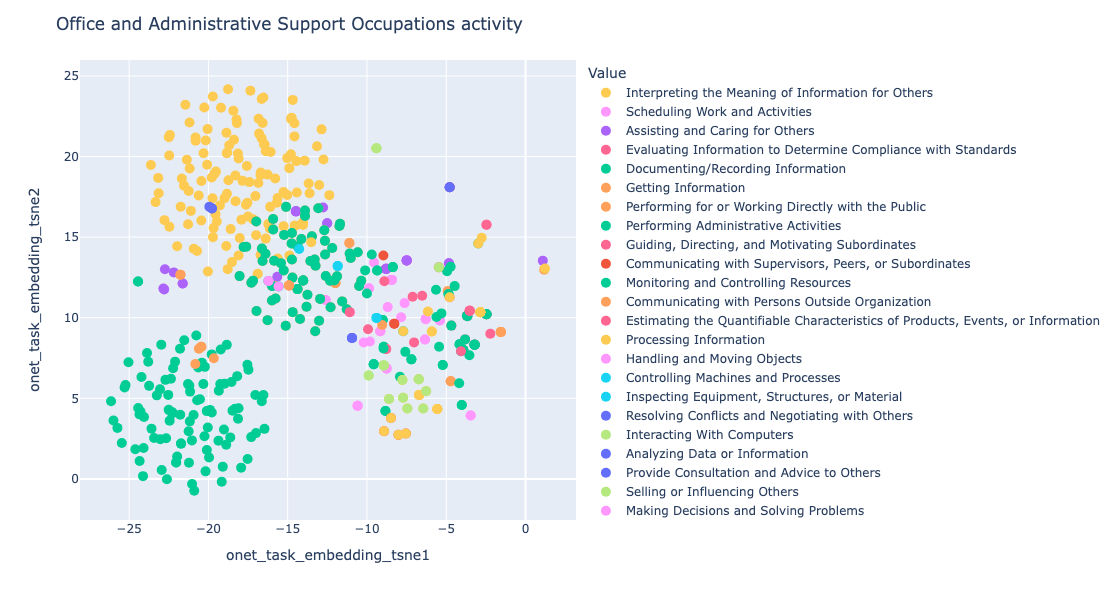

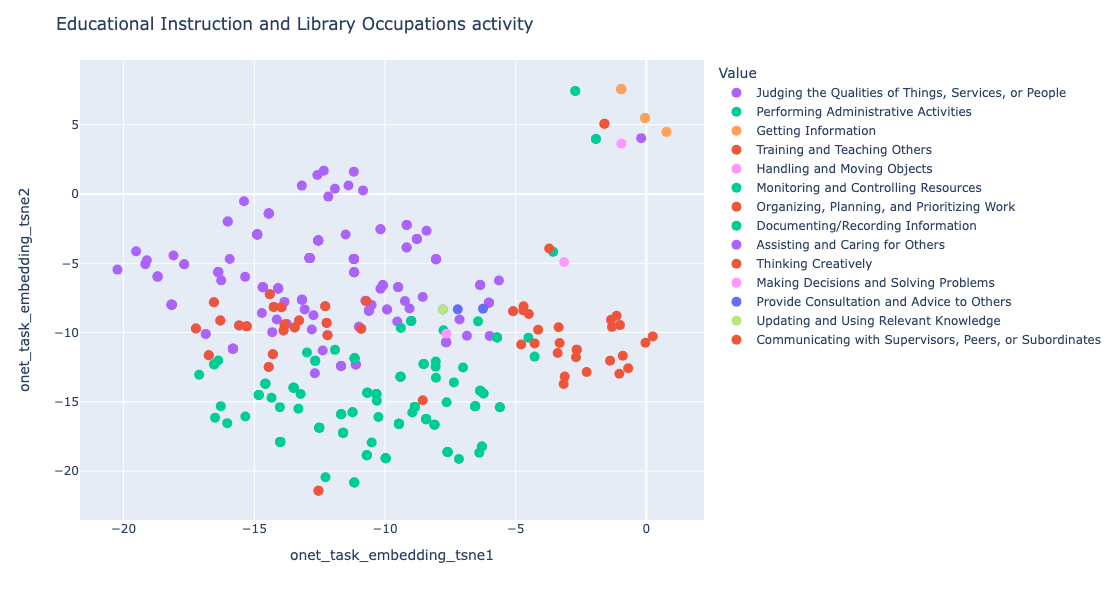

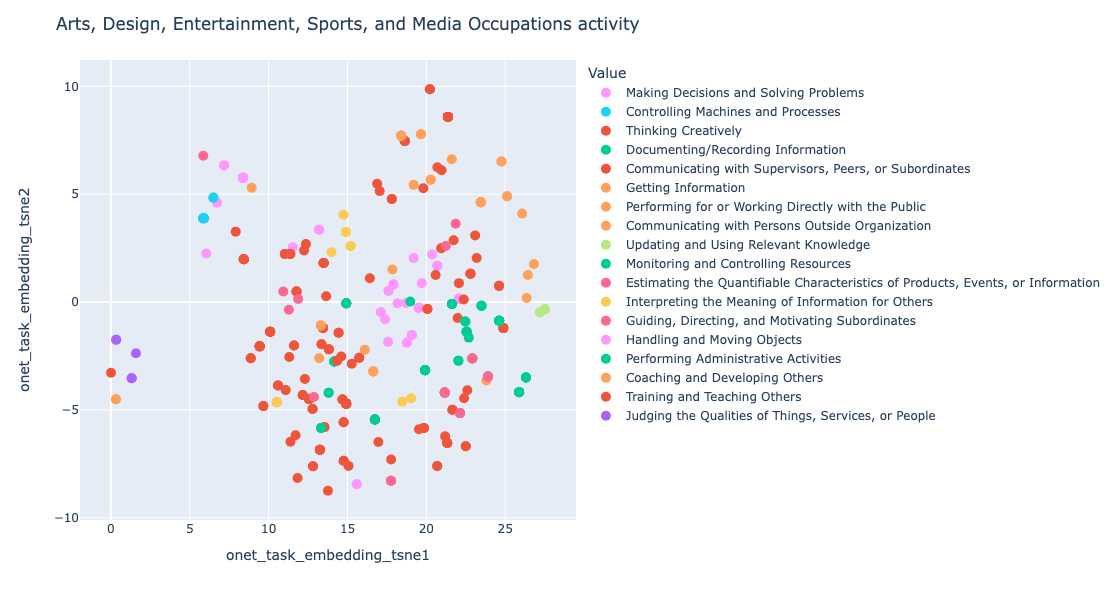

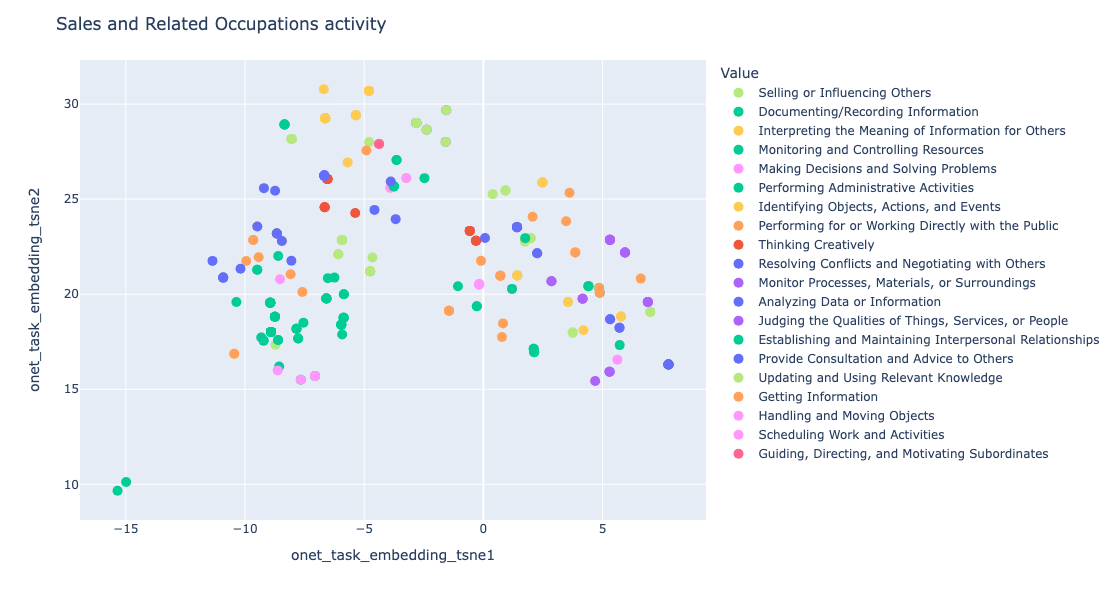

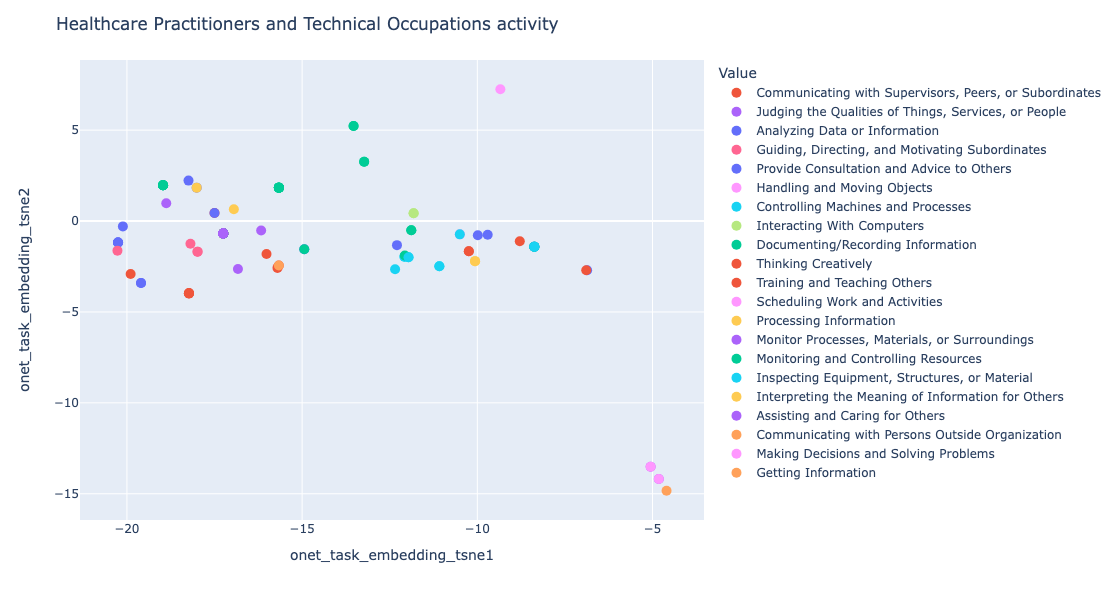

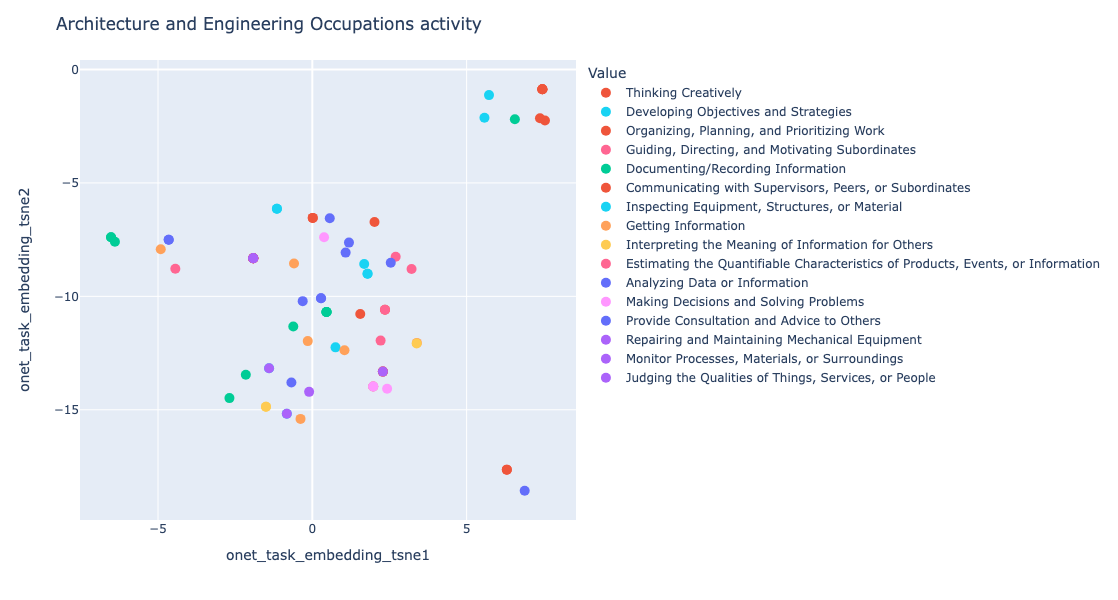

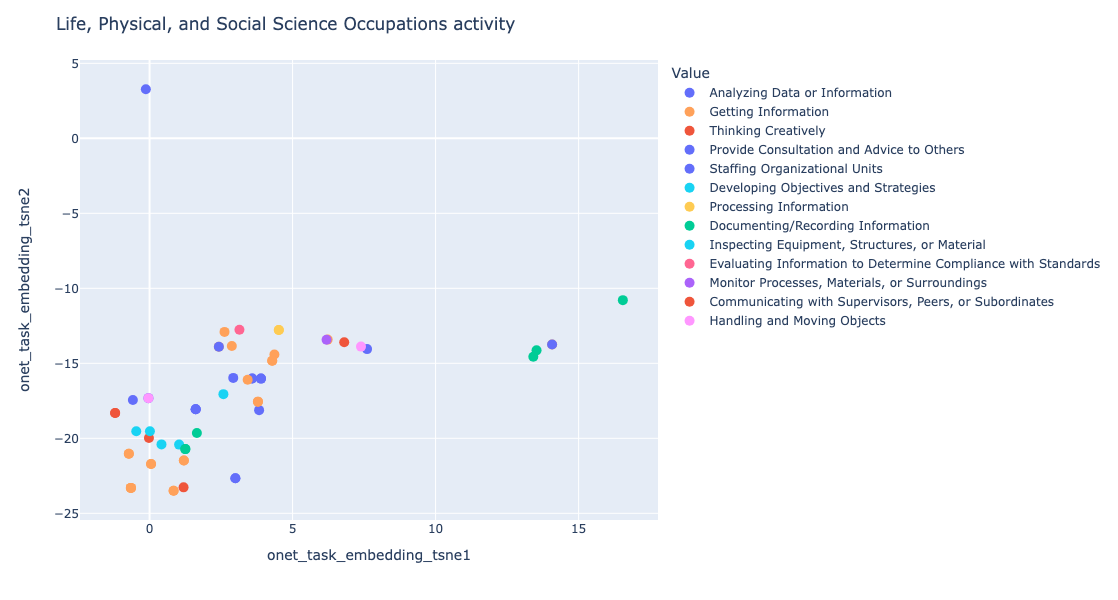

In [45]:
occ_groups = list(tf.groupby("Major Group Name")["dwa_count"].sum().sort_values(ascending=False).index)

value = "activity"
for occ_group in occ_groups[:10]:
    graph_df = tf[tf["Major Group Name"] == occ_group]
    graph_df.head()
    # Plot using Plotly with clusters
    fig = px.scatter(graph_df, x='onet_task_embedding_tsne1', y='onet_task_embedding_tsne2',
                     color=value,
                     hover_data=['onet_task','job'],
                     color_discrete_map=color_map,
                     range_color=[0, .3],
                     labels={value: 'Value'})
    fig.update_traces(marker_size=10)                  
    
    fig.update_layout(
        title=f"{occ_group} {value}", 
        hovermode='closest',
        width=1000,  # Set the width of the figure
        height=600  # Set the height of the figure
    )
    fig.show()

In [50]:
occ_groups = list(tf.groupby("Major Group Name")["dwa_count"].sum().sort_values(ascending=False).index)

value = "EMP"
for occ_group in occ_groups[:10]:
    graph_df = tf[tf["Major Group Name"] == occ_group]
    graph_df.head()
    # Plot using Plotly with clusters
    fig = px.scatter(graph_df, x='onet_task_embedding_tsne1', y='onet_task_embedding_tsne2',
                     color=value,
                     hover_data=['onet_task','job','website'],
                     labels={value: 'Value'})
    fig.update_traces(marker_size=10)                  
    
    fig.update_layout(
        title=f"{occ_group} {value}", 
        hovermode='closest',
        width=1000,  # Set the width of the figure
        height=600  # Set the height of the figure
    )
    fig.show()

ValueError: Value of 'color' is not the name of a column in 'data_frame'. Expected one of ['Unnamed: 0', 'organization name', 'number', 'Example', 'example_task_embedding', 'founded date', 'website', 'description_all', 'industries_parsed', 'generated_description', 'parsed_description', 'Tasks/Jobs', 'Industry', 'Customers', 'generated_description_conf_interval', 'parsed_description_conf_interval', 'organization_name', 'example', 'situation_conf_interval', 'situation_conf_interval_reasoning', 'job', 'onet_title', 'onet_task', 'example_job_title', 'task_similarity', 'job_title_similarity', 'onet_weight', 'Major Group', 'Minor Group', 'Broad Group', 'Detailed Occupation', 'Title', 'Major Group Name', 'Minor Group Name', 'Broad Group Name', 'Active Learning', 'Active Listening', 'Complex Problem Solving', 'Coordination', 'Critical Thinking', 'Equipment Maintenance', 'Equipment Selection', 'Installation', 'Instructing', 'Judgment and Decision Making', 'Learning Strategies', 'Management of Financial Resources', 'Management of Material Resources', 'Management of Personnel Resources', 'Mathematics', 'Monitoring', 'Negotiation', 'Operation and Control', 'Operations Analysis', 'Operations Monitoring', 'Persuasion', 'Programming', 'Quality Control Analysis', 'Reading Comprehension', 'Repairing', 'Science', 'Service Orientation', 'Social Perceptiveness', 'Speaking', 'Systems Analysis', 'Systems Evaluation', 'Technology Design', 'Time Management', 'Troubleshooting', 'Writing', 'AREA', 'AREA_TITLE', 'AREA_TYPE', 'PRIM_STATE', 'NAICS', 'NAICS_TITLE', 'I_GROUP', 'OWN_CODE', 'OCC_TITLE', 'O_GROUP', 'TOT_EMP', 'EMP_PRSE', 'JOBS_1000', 'LOC_QUOTIENT', 'PCT_TOTAL', 'PCT_RPT', 'H_MEAN', 'A_MEAN', 'MEAN_PRSE', 'H_PCT10', 'H_PCT25', 'H_MEDIAN', 'H_PCT75', 'H_PCT90', 'A_PCT10', 'A_PCT25', 'A_MEDIAN', 'A_PCT75', 'A_PCT90', 'ANNUAL', 'HOURLY', 'Task', 'onet_task_embedding', 'onet_title_embedding', 'Task ID', 'example_task_embedding_tsne1', 'example_task_embedding_tsne2', 'onet_task_embedding_tsne1', 'onet_task_embedding_tsne2', 'onet_title_embedding_tsne1', 'onet_title_embedding_tsne2', 'DWA ID', 'dwa_count', 'activity'] but received: EMP

In [46]:
list(tf.columns)

['Unnamed: 0',
 'organization name',
 'number',
 'Example',
 'example_task_embedding',
 'founded date',
 'website',
 'description_all',
 'industries_parsed',
 'generated_description',
 'parsed_description',
 'Tasks/Jobs',
 'Industry',
 'Customers',
 'generated_description_conf_interval',
 'parsed_description_conf_interval',
 'organization_name',
 'example',
 'situation_conf_interval',
 'situation_conf_interval_reasoning',
 'job',
 'onet_title',
 'onet_task',
 'example_job_title',
 'task_similarity',
 'job_title_similarity',
 'onet_weight',
 'Major Group',
 'Minor Group',
 'Broad Group',
 'Detailed Occupation',
 'Title',
 'Major Group Name',
 'Minor Group Name',
 'Broad Group Name',
 'Active Learning',
 'Active Listening',
 'Complex Problem Solving',
 'Coordination',
 'Critical Thinking',
 'Equipment Maintenance',
 'Equipment Selection',
 'Installation',
 'Instructing',
 'Judgment and Decision Making',
 'Learning Strategies',
 'Management of Financial Resources',
 'Management of Materia

In [98]:
len(lf["DWA ID"].unique())

517

In [89]:
len(pd.read_csv("../input/onet/Tasks to DWAs.csv")["DWA Title"].unique())

2070

In [134]:
len(df)

14068

In [31]:
dwa = pd.read_csv("../input/onet/task to dwa 2022.csv")[3:].reset_index(drop=True)
dwa.columns = ["Type","ID","Task","linkages"]

dwa["DWA ID"] = "N/A"
current_dwa_id = None
for index, row in dwa.iterrows():
    if row['Type'] == 'DWA':
        current_dwa_id = row['ID']
    else:
        dwa.at[index, 'DWA ID'] = current_dwa_id

# Print the updated DataFrame
dwa.head()

Type                 ID                                               Task  \
0  NaN              4.A.1  Information Input – Where and how are the info...   
1  NaN            4.A.1.a  Looking for and Receiving Job-Related Informat...   
2  GWA          4.A.1.a.1  Getting Information – Observing, receiving, an...   
3  IWA      4.A.1.a.1.I01             Study details of artistic productions.   
4  DWA  4.A.1.a.1.I01.D01                    Review art or design materials.   

          linkages DWA ID  
0              NaN   None  
1              NaN   None  
2  Work Activities   None  
3              NaN   None  
4    Tasks to DWAs    N/A

In [32]:
dwa = dwa[dwa["Type"]=="Task Example"][["Task","DWA ID"]]
# dwa = dwa.rename({"ID":"Task ID"},axis=1)
grouped = dwa.groupby("Task").aggregate({"DWA ID":"count"}).apply(lambda x: 1/x).reset_index()
grouped = grouped.rename({"DWA ID":"dwa_count"},axis=1)
dwa = dwa.merge(grouped,on="Task")

In [26]:
dwa["Task ID"] = dwa["Task ID"].astype("int")

In [34]:
tf = df.merge(dwa,on="Task",how="left")
tf[tf["DWA ID"].isnull()].onet_task

200     Monitor all aspects of patient care, including...
340     Post and update content on the company's Web s...
343     Plan study of work problems and procedures, su...
511             Arrange hospital admissions for patients.
647     Develop, administer, and evaluate applicant te...
648     Post and update content on the company's Web s...
771     Develop data model describing data elements an...
1139    Conduct research to develop methodologies, ins...
1287    Advise client on interior design factors, such...
1349    Coordinate property closings, overseeing signi...
1430    Ensure that policy requirements are fulfilled,...
1471    Ensure that policy requirements are fulfilled,...
1474    Post and update content on the company's Web s...
1575    Use materials such as pens and ink, watercolor...
1734    Plan study of work problems and procedures, su...
1844    Select substitute titles when requested materi...
1852    Determine the scope of educational program off...
1887    Compil

In [ ]:
- socio economic status 
- hourly annual 
- pew research center website socio economic data
- location of jobs
- related occupation, group by most links
https://www.bls.gov/oes/tables.htm